In [8]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Raw sample data

In [9]:
files = glob("data/samples/*csv")

In [10]:
len(files)

10

Each file corresponds with samples from a "satellite"

In [11]:
files[:5]

['data/samples/sat9.csv',
 'data/samples/sat8.csv',
 'data/samples/sat5.csv',
 'data/samples/sat4.csv',
 'data/samples/sat6.csv']

In [12]:
df = pd.read_csv(files[0])

In [13]:
df.shape

(1000, 6)

In [14]:
df.head()

,temp_c,battery_charge_pct,altitude,sensor1,sensor2,sensor3
0,15.72,69.83,1758.93,-0.35,-0.49,-0.61
1,21.69,57.11,1477.51,-0.51,-0.36,-0.65
2,13.95,52.28,1953.51,-0.72,-0.58,-0.50
3,20.53,42.65,1808.78,-0.71,-0.57,-0.73
4,5.65,48.37,516.80,-0.70,-0.67,-0.65


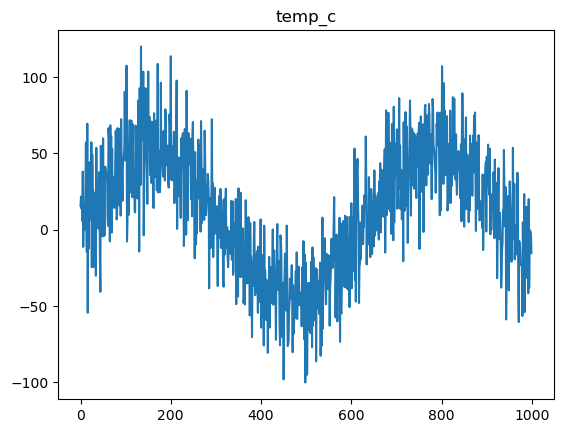

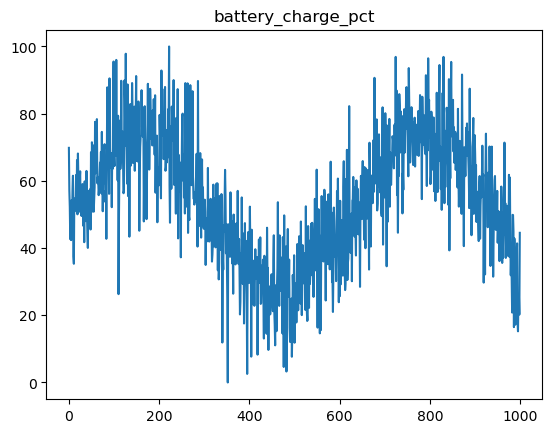

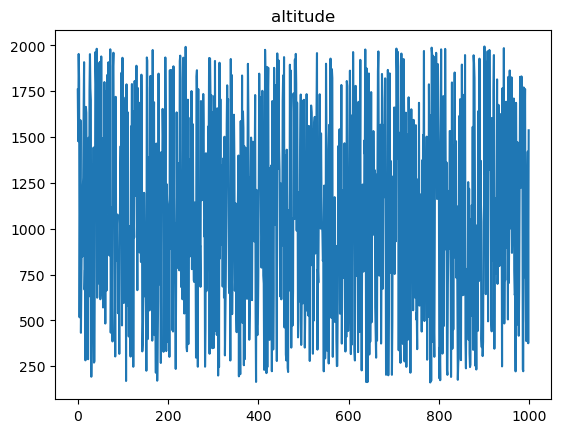

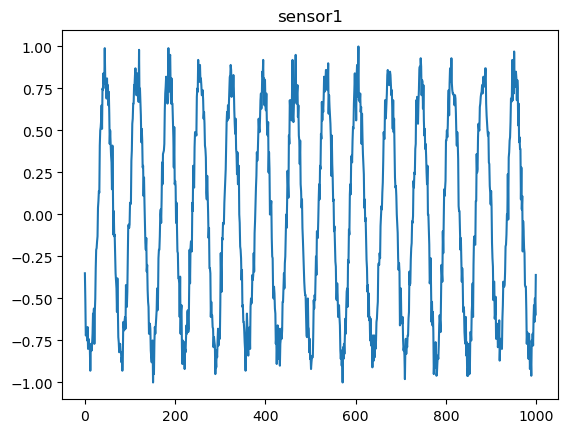

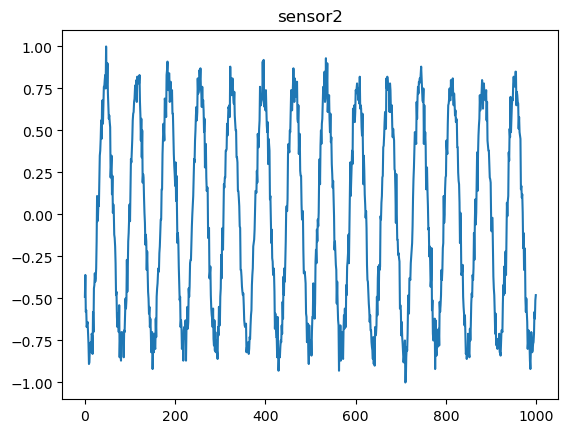

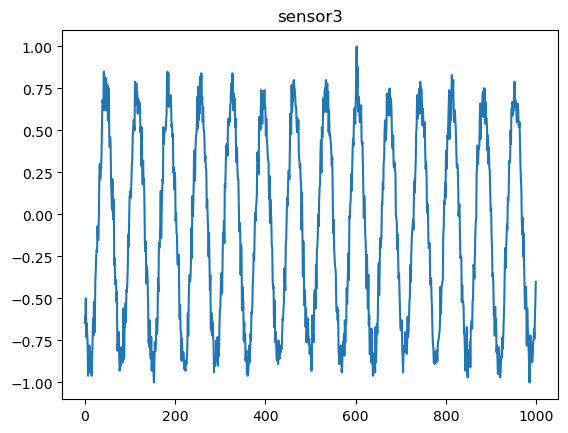

In [15]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

# Delta Tables

## satellite-data-raw

You should run the system first to generate the files.

In [19]:
files = glob("./data/delta-tables/satellite-data-raw/*parquet")

In [20]:
len(files)

145

In [21]:
files[:5]

['./data/delta-tables/satellite-data-raw/part-00000-dcc49fc5-72f2-450d-b32d-bb8b9469db43-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-e54fe4b4-8206-4757-b506-52f8d355bb84-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-ad4cec66-1f5d-45ea-9e67-897fec9d1ecb-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-511c723b-fdb1-44ef-ae55-fc5ce2b540b3-c000.snappy.parquet',
 './data/delta-tables/satellite-data-raw/part-00000-99fd5532-4438-44ee-9262-0b64a90c4078-c000.snappy.parquet']

Right now there are many smaller files, in production there would be a periodic process to "optimize" the delta table by aggregating these files in larger ones for more efficient querying.

For now, we can read them in memory and work with the data.

In [22]:
df = pd.read_parquet(files)

In [23]:
df.head()

,satelliteName,timestampNs,tempC,batteryChargePct,altitudeKm,sensor1,sensor2,sensor3,receivedTimestamp
0,sat5,1687909900400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,1687909899419
1,sat5,1687909900400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,1687909899555
2,sat5,1687909900400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,1687909899655
3,sat5,1687909900400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,1687909899838
4,sat5,1687909900400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,1687909899999


In [24]:
df["timestampNs"] = pd.to_datetime(df.timestampNs) # nanoseconds
df["receivedTimestamp"] = pd.to_datetime(df.receivedTimestamp, unit="ms") # milliseconds

In [25]:
df.head()

,satelliteName,timestampNs,tempC,batteryChargePct,altitudeKm,sensor1,sensor2,sensor3,receivedTimestamp
0,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,2023-06-27 23:51:39.419
1,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,2023-06-27 23:51:39.555
2,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,2023-06-27 23:51:39.655
3,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,2023-06-27 23:51:39.838
4,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66,2023-06-27 23:51:39.999


In [26]:
df.set_index("receivedTimestamp", inplace=True)
df.sort_index(inplace=True)

In [27]:
df.head()

,satelliteName,timestampNs,tempC,batteryChargePct,altitudeKm,sensor1,sensor2,sensor3
receivedTimestamp,,,,,,,,
2023-06-27 23:51:39.419,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66
2023-06-27 23:51:39.555,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66
2023-06-27 23:51:39.655,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66
2023-06-27 23:51:39.838,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66
2023-06-27 23:51:39.999,sat5,2023-06-27 23:51:40.400800766,5.92,60.68,1932.45,-0.52,-0.75,-0.66


Now let's resample the data and calculate the mean over the resample window

In [35]:
df_resampled = df.loc[:, df.columns[~df.columns.str.contains("timestampNs")]]\
    .groupby("satelliteName").resample("1min").mean(numeric_only=True)

In [36]:
df_resampled.sort_index().head()

tempC  batteryChargePct   altitudeKm  \
satelliteName receivedTimestamp                                               
sat0          2023-06-27 23:52:00  25.034762         59.468889  1134.951429   
              2023-06-27 23:53:00  43.022857         66.668571   919.402857   
              2023-06-27 23:54:00  45.345769         68.000769   990.197308   
              2023-06-27 23:55:00  35.787222         70.131111  1091.667222   
              2023-06-27 23:56:00  11.798681         55.465824  1009.126484   

                                    sensor1   sensor2   sensor3  
satelliteName receivedTimestamp                                  
sat0          2023-06-27 23:52:00  0.019683  0.032540  0.021587  
              2023-06-27 23:53:00 -0.185714 -0.161429 -0.218571  
              2023-06-27 23:54:00 -0.651923 -0.605000 -0.627308  
              2023-06-27 23:55:00  0.386111  0.430556  0.390000  
              2023-06-27 23:56:00  0.122198  0.128901  0.116703